## Objective

 To create a <b> Decision Tree Classifier</b> to predct the safety of car.

In [2]:
# Importing necessay modules and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

## Dataset
The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

In [4]:
import os

dataset = pd.read_csv('../Decision Tree/car_evaluation.csv')

## Exploratory Data Analysis

In [5]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
dataset.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
# Renaming the functions in our dataset
dataset.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
# Checking null values 
dataset.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
# frquency of categorical data
for col in dataset.columns:
    print(dataset[col].value_counts())
    print('\n')

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64


high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64


3        432
4        432
5more    432
2        431
Name: doors, dtype: int64


4       576
more    576
2       575
Name: persons, dtype: int64


med      576
big      576
small    575
Name: lug_boot, dtype: int64


med     576
high    576
low     575
Name: safety, dtype: int64


unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64




#### Here, we can see that all the features are categorical. And We can classify them in terms of class.

In [12]:
x = dataset.iloc[:, :-1]

In [13]:
y = dataset.iloc[:, -1]

### Test train split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=23)

In [15]:
x_train.shape, y_train.shape, x_test.shape

((1295, 6), (1295,), (432, 6))

## Feature Engineering

###  Converting catogerical features into numerical

In [16]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
802,high,low,3,more,small,high
1661,low,low,3,4,big,low
797,high,low,3,4,big,low
651,high,med,2,2,med,med
904,med,vhigh,3,4,med,high


In [18]:
x_train = pd.get_dummies(x_train)
x_train.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
802,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
1661,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
797,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
651,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
904,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [19]:
x_test = pd.get_dummies(x_test)
x_test.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1277,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
477,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1687,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1443,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
206,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


## Models

### 1. Decision Tree Model using gini impurity criterion

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
DTree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=32)

DTree_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

In [22]:
y_pred_gini = DTree_gini.predict(x_test)
y_pred_gini[:15]

array(['unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc'],
      dtype=object)

#### Model Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score

print(f"Model Accutacy Score : {round(accuracy_score(y_test, y_pred_gini), 4)}")
print()

Model Accutacy Score : 0.8079



#### Training set Accuracy

In [24]:
pred = DTree_gini.predict(x_train)

print(f"Training Set Accuracy : {round(accuracy_score(y_train, pred), 4)}0")

Training Set Accuracy : 0.80460


In [25]:
print(f'Train set Accuracy : {round(DTree_gini.score(x_train, y_train), 4)}')
print(f'Test set Accuracy  : {round(DTree_gini.score(x_test, y_test), 4)}')

Train set Accuracy : 0.8046
Test set Accuracy  : 0.8079


## Visualizing Decision Tree

[Text(372.0, 380.52, 'X[19] <= 0.5\ngini = 0.468\nsamples = 1295\nvalue = [293, 54, 895, 53]'),
 Text(279.0, 271.8, 'X[12] <= 0.5\ngini = 0.59\nsamples = 859\nvalue = [293, 54, 459, 53]'),
 Text(186.0, 163.07999999999998, 'X[3] <= 0.5\ngini = 0.632\nsamples = 581\nvalue = [293, 54, 181, 53]'),
 Text(93.0, 54.360000000000014, 'gini = 0.628\nsamples = 438\nvalue = [239, 54, 92, 53]'),
 Text(279.0, 54.360000000000014, 'gini = 0.47\nsamples = 143\nvalue = [54, 0, 89, 0]'),
 Text(372.0, 163.07999999999998, 'gini = 0.0\nsamples = 278\nvalue = [0, 0, 278, 0]'),
 Text(465.0, 271.8, 'gini = 0.0\nsamples = 436\nvalue = [0, 0, 436, 0]')]

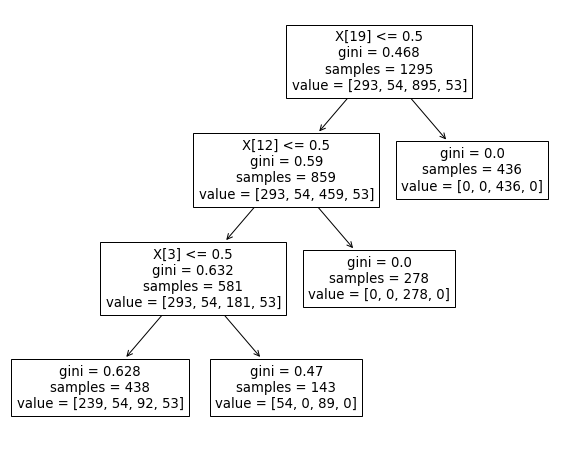

In [26]:
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(DTree_gini.fit(x_train, y_train))

### 2. Decision Tree Model using entropy impurity criterion

In [27]:
DTree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=32)

In [28]:
DTree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=32)

In [29]:
y_pred_entropy = DTree_entropy.predict(x_test)

#### Model Accuracy score

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print(f'Accuracy Score : {round(accuracy_score(y_test, y_pred_entropy), 4)}')

Accuracy Score : 0.7778


#### Checking Overfitting or under fitting by compairing Train-Test set scores

In [32]:
print(f'Training set score : {round(DTree_entropy.score(x_train, y_train), 4)}')
print(f'Test set score : {round(DTree_entropy.score(x_test, y_test), 4)}')

Training set score : 0.7776
Test set score : 0.7778


#### The training-set accuracy score is 0.7776 while the test-set accuracy to be 0.7778 which are comparable. So, there is no sign of overfitting.

In [33]:
### Decision Tree Visualization

In [34]:
from sklearn import tree

[Text(372.0, 380.52, 'X[19] <= 0.5\nentropy = 1.233\nsamples = 1295\nvalue = [293, 54, 895, 53]'),
 Text(279.0, 271.8, 'X[12] <= 0.5\nentropy = 1.511\nsamples = 859\nvalue = [293, 54, 459, 53]'),
 Text(186.0, 163.07999999999998, 'X[1] <= 0.5\nentropy = 1.656\nsamples = 581\nvalue = [293, 54, 181, 53]'),
 Text(93.0, 54.360000000000014, 'entropy = 1.402\nsamples = 427\nvalue = [224, 16, 167, 20]'),
 Text(279.0, 54.360000000000014, 'entropy = 1.808\nsamples = 154\nvalue = [69, 38, 14, 33]'),
 Text(372.0, 163.07999999999998, 'entropy = 0.0\nsamples = 278\nvalue = [0, 0, 278, 0]'),
 Text(465.0, 271.8, 'entropy = 0.0\nsamples = 436\nvalue = [0, 0, 436, 0]')]

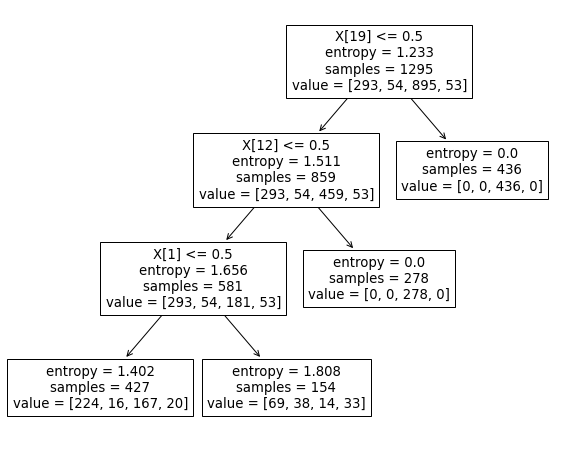

In [35]:
plt.figure(figsize=(10, 8))
tree.plot_tree(DTree_entropy.fit(x_train, y_train))

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_entropy))

[[ 91   0   0   0]
 [ 15   0   0   0]
 [ 69   0 245   0]
 [ 12   0   0   0]]


### Classification Report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.49      1.00      0.65        91
        good       0.00      0.00      0.00        15
       unacc       1.00      0.78      0.88       314
       vgood       0.00      0.00      0.00        12

    accuracy                           0.78       432
   macro avg       0.37      0.45      0.38       432
weighted avg       0.83      0.78      0.78       432



## Conclusion

In both the cases(gini and entropy), the training-set and test-set accuracy score is nearly the same for this dataset. It may happen because of small dataset. There are no signs of overfitting or underfitting in either of the cases.